In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

This notebook is inspired from https://www.kaggle.com/dwin183287/kagglers-seen-by-continents for learning purposes. Thanks to the author for wonderful visualizations

In [2]:
survey2020 = pd.read_csv(r'E:\Coding\Data science practice\kaggle_a\kaggle_repo\data\kaggle_survey_2020_responses.csv')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
col_details = survey2020.loc[0]

In [4]:
# index 0 is unncessary. so we are ignoring it

In [5]:
survey2020.drop(0, inplace=True)

In [6]:
survey2020.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
survey2020.shape

(20036, 355)

### sorting according to continent

In [8]:
continent_df = pd.read_csv(r'E:\Coding\Data science practice\kaggle_a\kaggle_repo\data\2020 continents.csv')

In [9]:
continent_df.head()

,Country,Continents
0,India,Asia
1,United States of America,America
2,Other,Others
3,Brazil,America
4,Japan,Asia


In [10]:
continent_dict = {c:d for c,d in zip(continent_df['Country'],continent_df['Continents'])}

In [11]:
survey2020['continent'] = survey2020['Q3'].map(continent_dict)

In [12]:
survey2020[['Q3','continent']].head()

,Q3,continent
1,Colombia,America
2,United States of America,America
3,Argentina,America
4,United States of America,America
5,Japan,Asia


In [13]:

cont_dict = {'United States of America':'USA','United Arab Emirates':'UAE',
             'United Kingdom of Great Britain and Northern Ireland':'UK',
             'Iran, Islamic Republic of...':'Iran'}
survey2020['Q3'].replace(cont_dict,inplace=True)

In [14]:
survey2020_asia = survey2020[survey2020['continent']=='Asia']
survey2020_america = survey2020[survey2020['continent']=='America']
survey2020_europe = survey2020[survey2020['continent']=='Europe']
survey2020_others = survey2020[survey2020['continent']=='Others']
survey2020_africa = survey2020[survey2020['continent']=='Africa']
survey2020_Aus = survey2020[survey2020['continent']=='Australia']

Let's see the total number of Kaggler's continent wise

In [15]:
# creating continent count df
countw = survey2020['continent'].value_counts()
countw = countw.to_frame()
countw.loc['India'] = 5851  # for showing the number of Kagglers in India
countw.reset_index(drop=False,inplace=True)
countw.columns = ['Continent','Count']
countw.sort_values('Count',inplace=True,ascending=False,ignore_index=True)

#creating country count df asia
countasia = survey2020_asia['Q3'].value_counts().to_frame()
countasia.reset_index(drop=False,inplace=True)
countasia.columns = ['Country','Count']
countasia.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
countasia = countasia.head(7)   # only first 7 countries

#creating country count df america
countamerica = survey2020_america['Q3'].value_counts().to_frame()
countamerica.reset_index(drop=False,inplace=True)
countamerica.columns = ['Country','Count']
countamerica.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
countamerica = countamerica.head(7)   # only first 7 countries

#creating country count df africa
countafrica = survey2020_africa['Q3'].value_counts().to_frame()
countafrica.reset_index(drop=False,inplace=True)
countafrica.columns = ['Country','Count']
countafrica.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
countafrica = countafrica.head(7)   # only first 7 countries

#creating country count df Europe
counteurope = survey2020_europe['Q3'].value_counts().to_frame()
counteurope.reset_index(drop=False,inplace=True)
counteurope.columns = ['Country','Count']
counteurope.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
counteurope = counteurope.head(7)   # only first 7 countries

#creating country count df Australia
countaus = survey2020_Aus['Q3'].value_counts().to_frame()
countaus.reset_index(drop=False,inplace=True)
countaus.columns = ['Country','Count']
countaus.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
countaus = countaus.head(7)   # only first 7 countries

#creating country count df others
countothers = survey2020_others['Q3'].value_counts().to_frame()
countothers.reset_index(drop=False,inplace=True)
countothers.columns = ['Country','Count']
countothers.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
countothers = countothers.head(7)   # only first 7 countries

In [16]:
countrydfs = [countasia,countamerica,countafrica,counteurope,countaus,countothers]
continents = ['Asia','America', 'Africa', 'Europe','Australia','Others']
palettes = ['flare_r','crest_r','magma','viridis_r','rocket','flare']

In fig 1 you can see, even though India is not a continent, it surpasses all the other continents alone. It accounts for almost 50% of Asia's Kagglers.

In [17]:
sns.set_style('darkgrid')

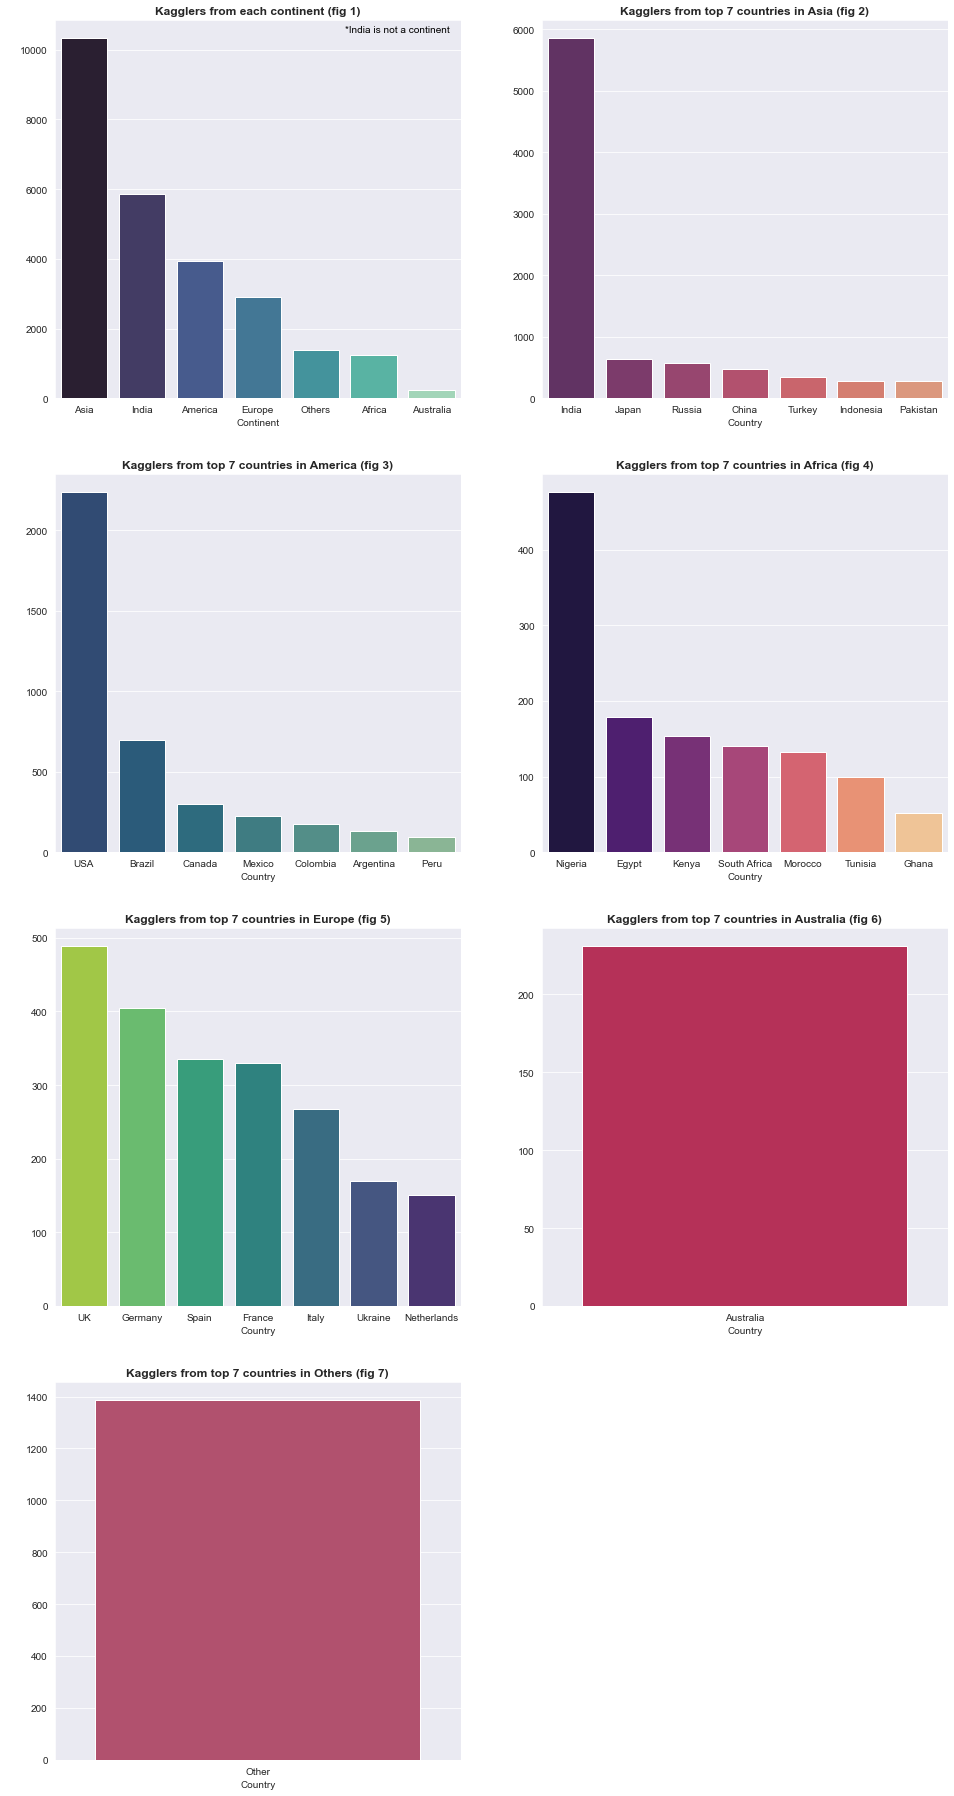

In [18]:
fig,ax = plt.subplots(4,2,figsize=(16,32))
# one plot each for continents and one for the world. One will be empty.
barw = sns.barplot(data=countw, x='Continent', y='Count', ax=ax[0][0], palette='mako')

#ax[0][0].add_patch(Rectangle((x_loc,y_loc),width,height,fc='#36bdc2'))
ax[0][0].text(4.5,10500,'*India is not a continent',c='k')
barw.set_title('Kagglers from each continent (fig 1)', fontweight='bold')
barw.set_ylabel(' ')

for data,continent,i,palette in zip(countrydfs,continents,range(len(continents)),palettes):
    i +=1
    r = i//2
    c = i%2
    bar = sns.barplot(data=data, x='Country',y='Count',ax=ax[r][c],palette=palette)
    bar.set_title(f'Kagglers from top 7 countries in {continent} (fig {i+1})', fontweight='bold')
    bar.set_ylabel(' ')
    

ax[3][1].remove() # removing the one additional axis which was there

In [19]:
survey_dfs = [survey2020_asia,survey2020_america,survey2020_africa,survey2020_europe,survey2020_Aus,survey2020_others]

In [20]:
sns.set_style('white')

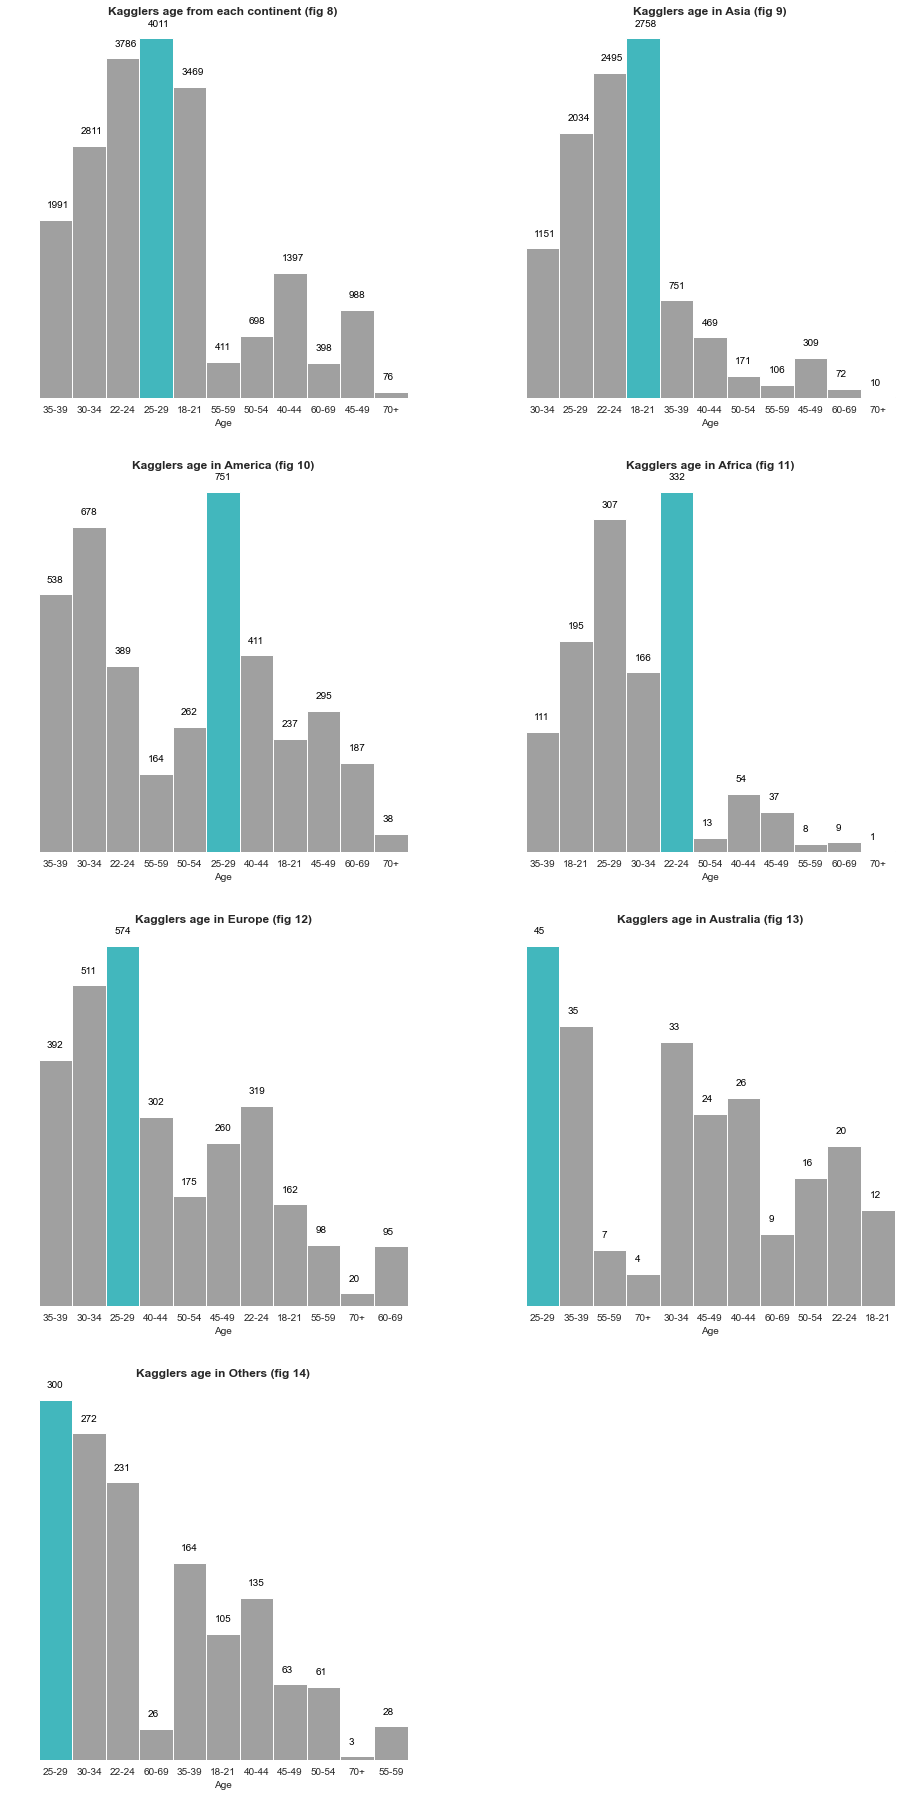

In [21]:
fig2,ax_1 = plt.subplots(4,2,figsize=(16,32))
# one plot each for continents and one for the world. One will be empty.
axis0 = ax_1[0][0]
barw = sns.histplot(data=survey2020, x='Q1',ax=axis0, color='grey')
barw.set_xlabel('Age')
barw.set_title('Kagglers age from each continent (fig 8)', fontweight='bold')
barw.set_ylabel(' ')
axis0.tick_params(axis='y',labelleft=False)
for spine in axis0.spines.values():
    spine.set_visible(0)
patch_h = []
for patch in barw.patches:
    reading = patch.get_height()
    patch_h.append(reading)
    _,ymax = axis0.get_ylim()
    y = reading + ymax/30
    x = patch.get_x() +  patch.get_width()/4
    axis0.annotate(str(reading),(x,y), c='k')
indxtallest = np.argmax(patch_h)
barw.patches[indxtallest].set_facecolor('#42b7bd')
    
for data,continent,i,palette in zip(survey_dfs,continents,range(len(continents)),palettes):
    i +=1
    r = i//2
    c = i%2
    axis = ax_1[r][c]
    bar = sns.histplot(data=data, x='Q1',ax=axis,color='grey')
    bar.set_xlabel('Age')
    bar.set_title(f'Kagglers age in {continent} (fig {i+8})', fontweight='bold')
    bar.set_ylabel(' ')
    axis.tick_params(axis='y',labelleft=False)
    
    for spine in axis.spines.values():
        spine.set_visible(False)
    
    patch_h = []
    for patch in bar.patches:
        reading = patch.get_height()
        patch_h.append(reading)
        _,ymax = axis.get_ylim()
        y = reading + ymax/30
        x = patch.get_x() + patch.get_width()/4
        axis.annotate(str(reading),(x,y), c='k')
    
    indxtallest = np.argmax(patch_h)
    bar.patches[indxtallest].set_facecolor('#42b7bd')
        
    
ax_1[3][1].remove() # removing the one additional axis which was there

 


In [22]:
survey2020['Q24'].unique()

array([nan, '100,000-124,999', '15,000-19,999', '125,000-149,999',
       '70,000-79,999', '30,000-39,999', '90,000-99,999', '1,000-1,999',
       '$0-999', '10,000-14,999', '150,000-199,999', '60,000-69,999',
       '4,000-4,999', '> $500,000', '300,000-500,000', '40,000-49,999',
       '25,000-29,999', '80,000-89,999', '7,500-9,999', '50,000-59,999',
       '250,000-299,999', '5,000-7,499', '2,000-2,999', '20,000-24,999',
       '200,000-249,999', '3,000-3,999'], dtype=object)

In [23]:
col_details['Q24']

'What is your current yearly compensation (approximate $USD)?'

In [24]:
survey2020['Q24'].value_counts()

$0-999             2128
10,000-14,999       665
1,000-1,999         581
100,000-124,999     573
40,000-49,999       552
30,000-39,999       540
50,000-59,999       510
5,000-7,499         488
15,000-19,999       449
60,000-69,999       408
20,000-24,999       404
70,000-79,999       394
7,500-9,999         371
150,000-199,999     347
2,000-2,999         330
125,000-149,999     315
25,000-29,999       310
90,000-99,999       280
4,000-4,999         279
80,000-89,999       273
3,000-3,999         264
200,000-249,999     115
300,000-500,000      55
> $500,000           50
250,000-299,999      48
Name: Q24, dtype: int64

In [25]:
cmpcat_list = ["$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", 
                                 "5,000-7,499", "7,500-9,999", "10,000-14,999", "15,000-19,999", 
                                 "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999", 
                                 "50,000-59,999", "60,000-69,999", "70,000-79,999", "80,000-89,999", "90,000-99,999", 
                                 "100,000-124,999", "125,000-149,999", "150,000-199,999", "200,000-249,999", 
                                 "250,000-299,999", "300,000-500,000", "> $500,000"]


In [26]:
compensation_df = survey2020['Q24'].value_counts().to_frame().reset_index(drop=False)
compensation_df.columns = ['Compensation','Count']
compensation_df['Compensation'] = pd.Categorical(compensation_df['Compensation'],cmpcat_list)
compensation_df.sort_values('Compensation',ascending=True,inplace=True,ignore_index=True)
compensation_df.set_index('Compensation',inplace=True)
compensation_df.columns = ['World']

compasia = survey2020_asia['Q24'].value_counts().to_frame().reset_index(drop=False)
compasia.columns = ['Compensation','Count']
compasia['Compensation'] = pd.Categorical(compasia['Compensation'],cmpcat_list)
compasia.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compasia.set_index('Compensation',inplace=True)
compasia.columns = ['Asia']

compamerica = survey2020_america['Q24'].value_counts().to_frame().reset_index(drop=False)
compamerica.columns = ['Compensation','Count']
compamerica['Compensation'] = pd.Categorical(compamerica['Compensation'],cmpcat_list)
compamerica.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compamerica.set_index('Compensation',inplace=True)
compamerica.columns = ['America']

compafrica = survey2020_africa['Q24'].value_counts().to_frame().reset_index(drop=False)
compafrica.columns = ['Compensation','Count']
compafrica['Compensation'] = pd.Categorical(compafrica['Compensation'],cmpcat_list)
compafrica.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compafrica.set_index('Compensation',inplace=True)
compafrica.columns = ['Africa']

compeurope = survey2020_europe['Q24'].value_counts().to_frame().reset_index(drop=False)
compeurope.columns = ['Compensation','Count']
compeurope['Compensation'] = pd.Categorical(compeurope['Compensation'],cmpcat_list)
compeurope.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compeurope.set_index('Compensation',inplace=True)
compeurope.columns = ['Europe']

compaus = survey2020_Aus['Q24'].value_counts().to_frame().reset_index(drop=False)
compaus.columns = ['Compensation','Count']
compaus['Compensation'] = pd.Categorical(compaus['Compensation'],cmpcat_list)
compaus.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compaus.set_index('Compensation',inplace=True)
compaus.columns = ['Australia']

compothers = survey2020_others['Q24'].value_counts().to_frame().reset_index(drop=False)
compothers.columns = ['Compensation','Count']
compothers['Compensation'] = pd.Categorical(compothers['Compensation'],cmpcat_list)
compothers.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compothers.set_index('Compensation',inplace=True)
compothers.columns = ['Others']


_ = 'this variable is just to make this cell to output anything'

In [27]:
all_country_df = pd.concat([compasia, compamerica, compafrica, compeurope, compaus, compothers],axis=1)
all_country_df.head()

,Asia,America,Africa,Europe,Australia,Others
Compensation,,,,,,
$0-999,1220,262,282.0,171,15.0,178
"1,000-1,999",296,102,60.0,57,3.0,63
"2,000-2,999",163,62,35.0,38,1.0,31
"3,000-3,999",153,35,32.0,24,NaN,20
"4,000-4,999",194,27,20.0,17,1.0,20


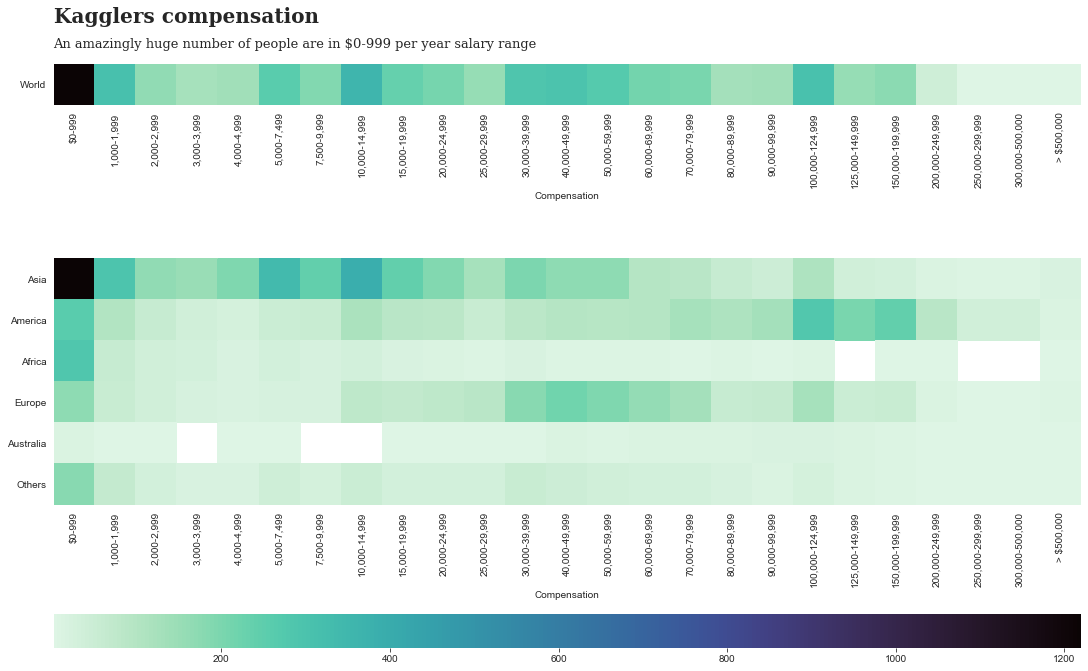

In [28]:
fig3 = plt.figure(figsize=(15,10),constrained_layout=True)
gs = fig3.add_gridspec(2,1)
gs.update(wspace=0,hspace=0.0001)
ax0 = fig3.add_subplot(gs[0,0])
ax1 = fig3.add_subplot(gs[1,0])

sns.set_style('darkgrid')
cmap = 'mako_r'
hm = sns.heatmap(data=compensation_df.T, ax=ax0, cbar=False, cbar_kws={'orientation':'horizontal'},square=True,
                cmap=cmap)
hm2 = sns.heatmap(data=all_country_df.T , ax=ax1, cbar_kws={'orientation':'horizontal'}, square=True,
                 cmap=cmap)
ax0.tick_params(axis='y',labelrotation=0)
ax1.tick_params(axis='y', labelrotation=0)
ax0.text(0,-1,'Kagglers compensation', fontsize=20, fontweight='bold', fontfamily='serif')
_ = ax0.text(0,-0.4, 'An amazingly huge number of people are in $0-999 per year salary range', fontsize=13, fontweight='light',fontfamily='serif')


In [29]:
# without 0-999
compworld_new = compensation_df.drop('$0-999')
all_country_new = all_country_df.drop('$0-999')

In [30]:
compworld_new.T

Compensation,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999","25,000-29,999",...,"70,000-79,999","80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-500,000","> $500,000"
World,581,330,264,279,488,371,665,449,404,310,...,394,273,280,573,315,347,115,48,55,50


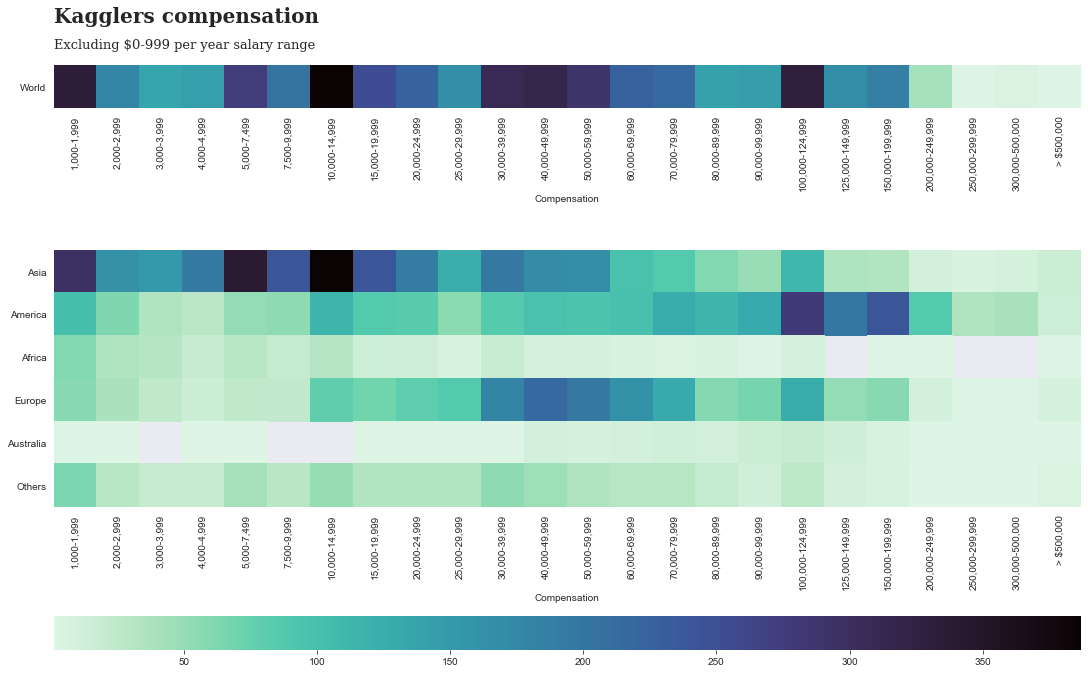

In [31]:
fig4 = plt.figure(figsize=(15,10), constrained_layout=True)
gs = fig4.add_gridspec(2,1)
gs.update(wspace=0,hspace=0.0001)
ax3 = fig4.add_subplot(gs[0,0])
ax4 = fig4.add_subplot(gs[1,0])

sns.set_style('darkgrid')
cmap = 'mako_r'
hm = sns.heatmap(data=compworld_new.T, ax=ax3, cbar=False, cbar_kws={'orientation':'horizontal'},square=True,
                cmap=cmap)
hm2 = sns.heatmap(data=all_country_new.T , ax=ax4, cbar_kws={'orientation':'horizontal'}, square=True,
                 cmap=cmap)
ax3.tick_params(axis='y',labelrotation=0)
ax4.tick_params(axis='y', labelrotation=0)
ax3.text(0,-1,'Kagglers compensation', fontsize=20, fontweight='bold', fontfamily='serif')
_ = ax3.text(0,-0.4, 'Excluding $0-999 per year salary range', fontsize=13, fontweight='light',fontfamily='serif')

In [32]:
from pandas.api.types import CategoricalDtype
cat = CategoricalDtype(categories=cmpcat_list,ordered=True)
_ = survey2020['Q24'].astype(cat)

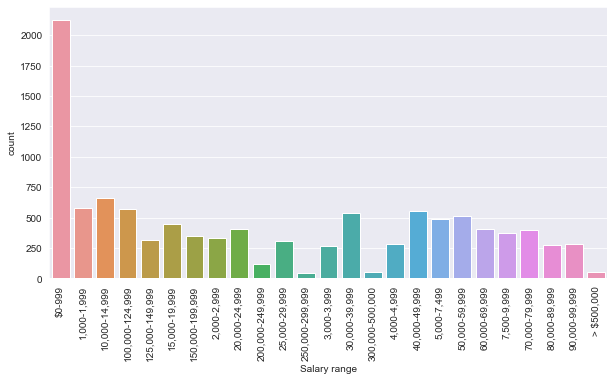

In [33]:
fig5,ax= plt.subplots(figsize=(10,5))
sorted_df = survey2020.sort_values('Q24')
dis = sns.countplot(data=sorted_df, x='Q24', ax=ax)
ax.tick_params(axis='x', which='major',labelrotation=90)
_ = ax.set_xlabel('Salary range')

In [34]:
survey2020.sort_values('Q24')['Q24'].unique()

array(['$0-999', '1,000-1,999', '10,000-14,999', '100,000-124,999',
       '125,000-149,999', '15,000-19,999', '150,000-199,999',
       '2,000-2,999', '20,000-24,999', '200,000-249,999', '25,000-29,999',
       '250,000-299,999', '3,000-3,999', '30,000-39,999',
       '300,000-500,000', '4,000-4,999', '40,000-49,999', '5,000-7,499',
       '50,000-59,999', '60,000-69,999', '7,500-9,999', '70,000-79,999',
       '80,000-89,999', '90,000-99,999', '> $500,000', nan], dtype=object)

### Gender

In [35]:
survey2020['Q2'].unique()

array(['Man', 'Woman', 'Prefer to self-describe', 'Prefer not to say',
       'Nonbinary'], dtype=object)

In [36]:
gencount_world = survey2020['Q2'].value_counts().to_dict()
gencount_asia = survey2020_asia['Q2'].value_counts().to_dict()
gencount_america = survey2020_america['Q2'].value_counts().to_dict()
gencount_africa = survey2020_africa['Q2'].value_counts().to_dict()
gencount_europe = survey2020_europe['Q2'].value_counts().to_dict()
gencount_aus = survey2020_Aus['Q2'].value_counts().to_dict()
gencount_others = survey2020_others['Q2'].value_counts().to_dict()

gencount_dicts = [gencount_asia, gencount_america, gencount_africa, gencount_europe, gencount_aus,
               gencount_others]
df_names = ['Asia','America','Africa','Europe','Australia','Others']

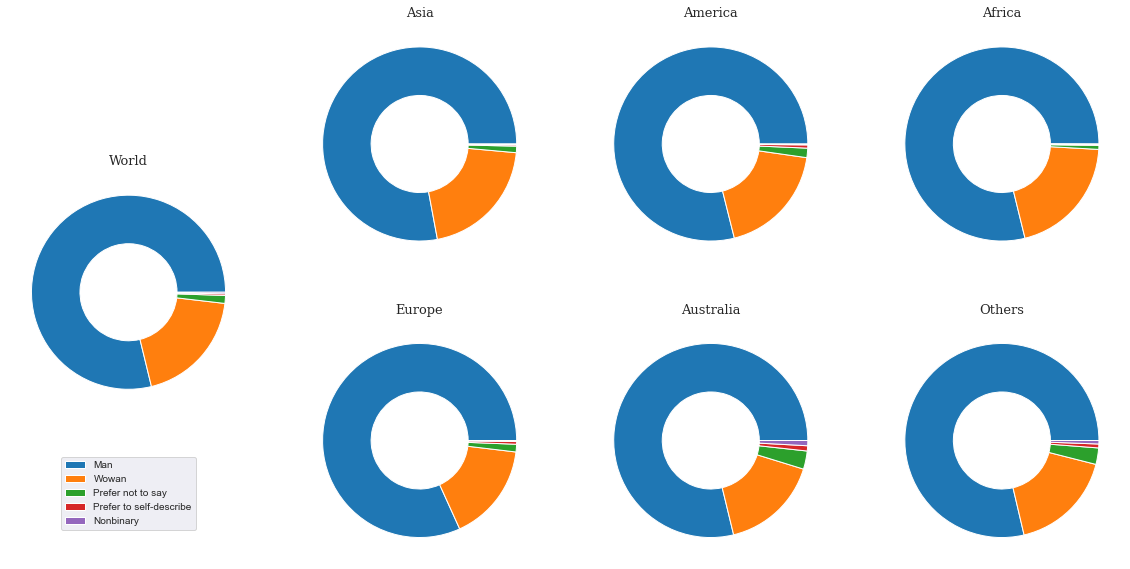

In [37]:
fig6 = plt.figure(figsize=(20,10))
gs = fig6.add_gridspec(2,4)
ax0 = fig6.add_subplot(gs[:,0])
ax123 = [fig6.add_subplot(gs[0,i+1]) for i in range(3)]
ax456= [fig6.add_subplot(gs[1,i+1]) for i in range(3)]
ax_list = ax123+ax456
cmap = sns.color_palette("magma", as_cmap=True)

ax0.pie(gencount_world.values(),wedgeprops=dict(width=0.5))
ax0.set_title('World',fontweight='light',fontsize=13,fontfamily='serif')
ax0.legend(['Man','Wowan','Prefer not to say','Prefer to self-describe','Nonbinary'], loc='lower center',
           bbox_to_anchor=(0.5,-0.5))

for countdict, title, ax in zip(gencount_dicts,df_names,ax_list):
    ax.pie(countdict.values(),wedgeprops=dict(width=0.5))
    ax.set_title(title,fontweight='light',fontsize=13,fontfamily='serif')



###  Education

In [38]:
educat_list = ["No formal education past high school",
               "Some college/university study without earning a bachelor’s degree",
               "Bachelor’s degree","Master’s degree", "Doctoral degree",
               "Professional degree","I prefer not to answer"]
world_edu = survey2020['Q4'].value_counts().to_frame().reset_index(drop=False)
world_edu.columns = ['Education','Count']
world_edu['Education'] = pd.Categorical(world_edu['Education'],educat_list,ordered=True)
world_edu.sort_values('Education',inplace=True,ignore_index=True)

asia_edu = survey2020_asia['Q4'].value_counts().to_frame().reset_index(drop=False)
asia_edu.columns = ['Education','Count']
asia_edu['Education'] = pd.Categorical(asia_edu['Education'],educat_list,ordered=True)
asia_edu.sort_values('Education',inplace=True,ignore_index=True)

america_edu = survey2020_america['Q4'].value_counts().to_frame().reset_index(drop=False)
america_edu.columns = ['Education','Count']
america_edu['Education'] = pd.Categorical(america_edu['Education'],educat_list,ordered=True)
america_edu.sort_values('Education',inplace=True,ignore_index=True)

africa_edu = survey2020_africa['Q4'].value_counts().to_frame().reset_index(drop=False)
africa_edu.columns = ['Education','Count']
africa_edu['Education'] = pd.Categorical(africa_edu['Education'],educat_list,ordered=True)
africa_edu.sort_values('Education',inplace=True,ignore_index=True)

europe_edu = survey2020_europe['Q4'].value_counts().to_frame().reset_index(drop=False)
europe_edu.columns = ['Education','Count']
europe_edu['Education'] = pd.Categorical(europe_edu['Education'],educat_list,ordered=True)
europe_edu.sort_values('Education',inplace=True,ignore_index=True)

aus_edu = survey2020_Aus['Q4'].value_counts().to_frame().reset_index(drop=False)
aus_edu.columns = ['Education','Count']
aus_edu['Education'] = pd.Categorical(aus_edu['Education'],educat_list,ordered=True)
aus_edu.sort_values('Education',inplace=True,ignore_index=True)

others_edu = survey2020_others['Q4'].value_counts().to_frame().reset_index(drop=False)
others_edu.columns = ['Education','Count']
others_edu['Education'] = pd.Categorical(others_edu['Education'],educat_list,ordered=True)
others_edu.sort_values('Education',inplace=True,ignore_index=True)

In [39]:
edu_dfs = [world_edu, asia_edu, america_edu, africa_edu, europe_edu, aus_edu, others_edu]

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator


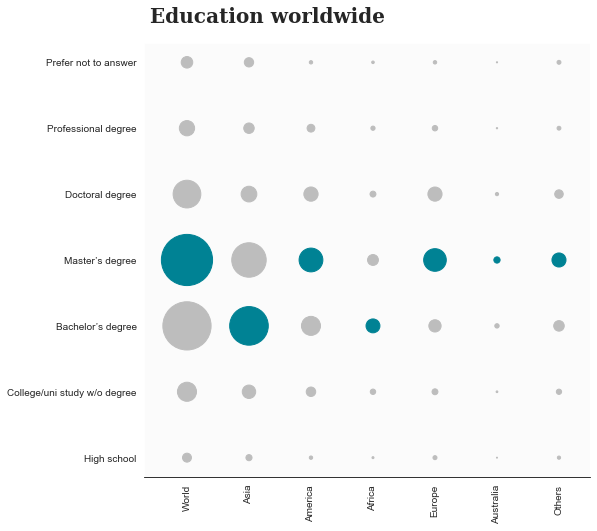

In [40]:
fig,ax = plt.subplots(figsize=(8,8))
y_dummy = np.arange(7)

color_map1 = ["#bdbdbd" for _ in range(7)]
color_map1[3] = "#008294"
color_map2 = ["#bdbdbd" for _ in range(7)]
color_map2[2] = "#008294"
color_map3 = ["#bdbdbd" for _ in range(7)]
color_map3[3] = "#008294"
color_map4 = ["#bdbdbd" for _ in range(7)]
color_map4[2] = "#008294"
color_map5 = ["#bdbdbd" for _ in range(7)]
color_map5[3] = "#008294"
color_map6 = ["#bdbdbd" for _ in range(7)]
color_map6[3] = "#008294"
color_map7 = ["#bdbdbd" for _ in range(7)]
color_map7[3] = "#008294"

cmaps = [color_map1, color_map2, color_map3, color_map4, color_map5, color_map6, color_map7]

for i,df,cmap in zip(range(7),edu_dfs,cmaps):
    i +=1
    scat = ax.scatter([i for _ in range(7)],y_dummy, s=df.Count/3,color=cmap)

ax.set_xlim((0.3,7.5))
ax.grid(b=False)
#fig.patch.set_facecolor('#fbfbfb')
ax.set_facecolor('#fbfbfb')
ax.set_xticklabels(['', 'World', 'Asia', 'America', 'Africa', 'Europe', 'Australia', 'Others'],rotation=90)
ax.set_yticklabels(['', "High school", "College/uni study w/o degree", "Bachelor’s degree", "Master’s degree",
                    "Doctoral degree", "Professional degree", "Prefer not to answer"])
ax.text(0.4,6.6,'Education worldwide',fontweight='bold',fontsize=20,fontfamily='serif')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('k')
_ = 'this var assignment is to ignore a lot of junk outputs. Please ignore'

### Relationship between education, job and salary

In [41]:
salary_mid = [500,1500,2500, 3500, 4500, 5500, 8750, 12500, 17500, 22500, 27500, 35000, 45000, 55000, 65000, 75000,
             85000, 95000, 125000, 137500, 175000, 225000, 275000, 400000, 510000]
salary_mid_dict = {k:v for k,v in zip(cmpcat_list,salary_mid)}
survey2020['salary_mid'] = survey2020['Q24'].replace(salary_mid_dict)
survey2020.sort_values('salary_mid',inplace=True)

In [42]:
salary_null = survey2020[survey2020['salary_mid'].isnull()]['Q4'].value_counts().to_frame().reset_index(drop=False)
salary_null.columns = ['Education','Null count']
salary_known = survey2020['Q4'].value_counts().to_frame().reset_index(drop=False)
salary_known.columns = ['Education','count']
salary_info = salary_known.merge(salary_null,how='outer',on='Education')
salary_info['Null %'] = round((salary_info['Null count']/salary_info['count']) *100,2)

In [43]:
salary_info

,Education,count,Null count,Null %
0,Master’s degree,7859,2980,37.92
1,Bachelor’s degree,6978,3965,56.82
2,Doctoral degree,2302,584,25.37
3,Some college/university study without earning ...,1092,707,64.74
4,Professional degree,699,229,32.76
5,I prefer not to answer,399,241,60.40
6,No formal education past high school,240,134,55.83


we don't have information about salary of more than 50% people in some cases

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


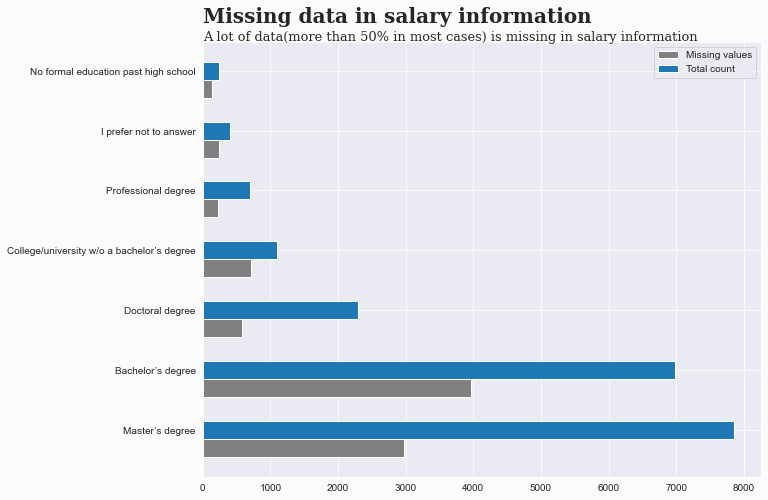

In [44]:
fig,ax = plt.subplots(figsize=(10,8))
sns.set_style('dark')
fig.patch.set_facecolor('#fbfbfb')
y_dummy = np.arange(7)
ax.barh(y_dummy-0.3,salary_info['Null count'],color='grey',height=0.3,label='Missing values')
ax.barh(y_dummy,salary_info['count'],height=0.3, label='Total count')
ax.legend()
ax.set_yticklabels(['','Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
                    'College/university w/o a bachelor’s degree',
                    'Professional degree', 'I prefer not to answer','No formal education past high school'])
ax.text(0, 6.8, 'Missing data in salary information', fontweight='bold', fontsize=20, fontfamily='serif')
_= ax.text(0, 6.5, 'A lot of data(more than 50% in most cases) is missing in salary information', 
       fontweight='light', fontsize=13, fontfamily='serif')

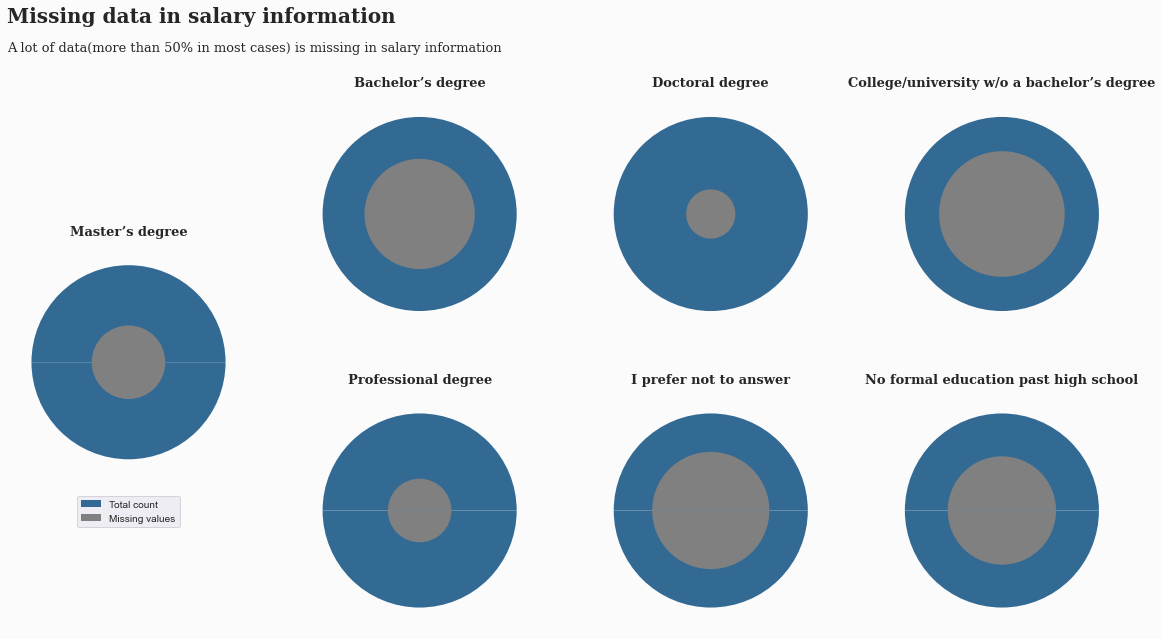

In [45]:
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(2,4)
fig.patch.set_facecolor('#fbfbfb')
ax0 = fig.add_subplot(gs[:,0])
ax123 = [fig.add_subplot(gs[0,i+1]) for i in range(3)]
ax456 = [fig.add_subplot(gs[1,i+1]) for i in range(3)]
axes = ax123 + ax456

wedgeprops = {'linewidth':0}
wedges,text = ax0.pie([1,1],colors=['#326a94','grey'],radius=1,wedgeprops=wedgeprops)
ax0.pie([1,1],colors=['grey','grey'],radius=0.379,wedgeprops=wedgeprops)
ax0.set_title('Master’s degree',fontweight='bold',fontsize=13,fontfamily='serif')
ax0.legend(['Total count','Missing values'], loc='lower center',bbox_to_anchor=(0.5,-0.2))
for wedge in wedges:
    wedge.set_facecolor('#326a94')


ed_list = ['Bachelor’s degree', 'Doctoral degree',
           'College/university w/o a bachelor’s degree',
           'Professional degree', 'I prefer not to answer',
           'No formal education past high school']
radie = salary_info['Null %']/100
radie.pop(0)

for ax,education,radius in zip(axes,ed_list,radie):
    pie1 = ax.pie([1,1],colors=['#326a94','#326a94'],radius=1,wedgeprops=wedgeprops)
    pie2 = ax.pie([1,1],colors=['grey','grey'],radius=radius,wedgeprops=wedgeprops)
    ax.set_title(education,fontweight='bold',fontsize=13,fontfamily='serif')
    
    '''
    for pies in pie1:
        for pie in pies:
            i=0
            if isinstance(pie,matplotlib.patches.Wedge) and i==0:
                center = pie.center
                ax.text(center[0]-0.05,center[1]+0.05,str(round(radius*100, 2))+'%',fontweight='bold')
    '''

ax0.text(-1.25, 3.5, 'Missing data in salary information', fontweight='bold', fontsize=20, fontfamily='serif')
_ = ax0.text(-1.25, 3.2, 'A lot of data(more than 50% in most cases) is missing in salary information', 
       fontweight='light', fontsize=13, fontfamily='serif')

### With available data, we can try to find the relationship between Education,job role and salary

One interesting thing to note is that when comparing salaries, Indian scale itself is only half of the entire world scale. Still then, Indian heatmap has got almost all the columns light. This could be because of the difference in economic structure of different countries.

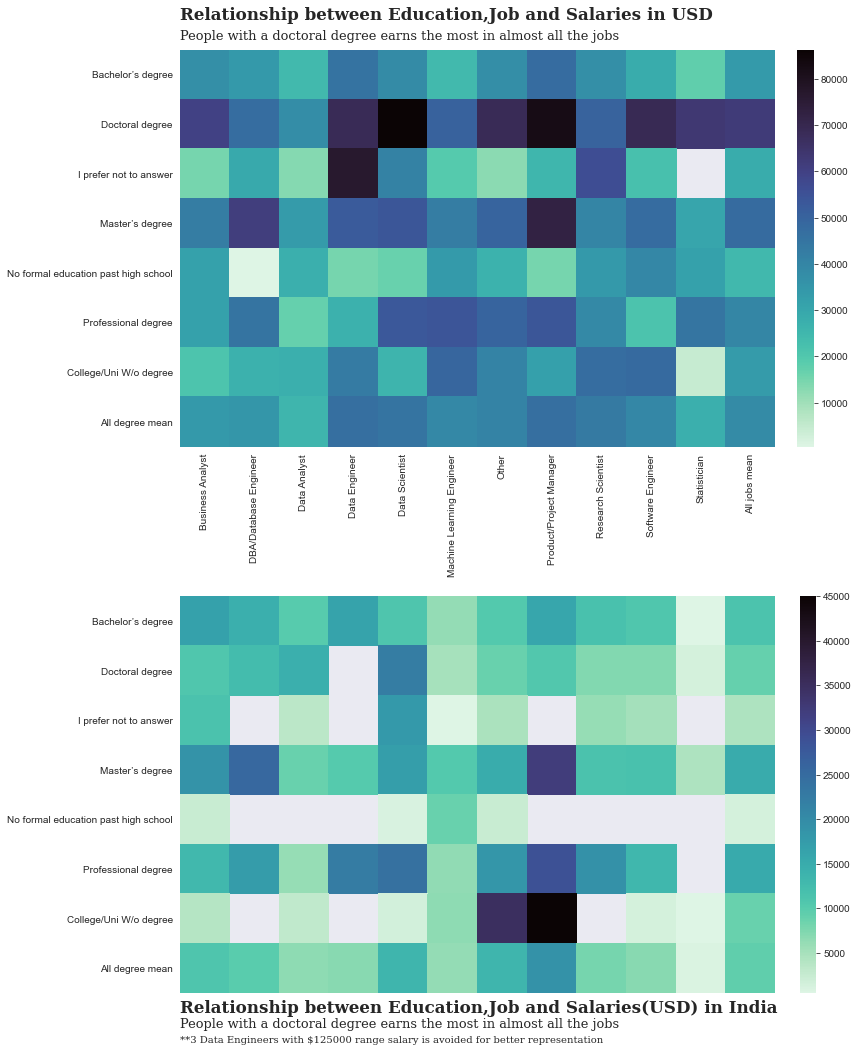

In [46]:
edu_job_df = survey2020.pivot_table(values='salary_mid', index='Q4',columns='Q5') 
edu_job_df.rename({'Some college/university study without earning a bachelor’s degree':
                   'College/Uni W/o degree'},inplace=True)
edu_job_df['All jobs mean'] = edu_job_df.apply(np.sum,axis=1)/11
edu_job_df.loc['All degree mean'] = edu_job_df.apply(np.sum, axis=0)/7


fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,14.5),constrained_layout=True)
sns.heatmap(data=edu_job_df,cmap='mako_r',square=True,ax=ax1 ,cbar_kws={"shrink":1})
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.text(0,-0.6,'Relationship between Education,Job and Salaries in USD',
        fontweight='bold',fontsize=16.8,fontfamily='serif')
ax1.text(0,-0.2,'People with a doctoral degree earns the most in almost all the jobs',
        fontweight='light',fontsize=13,fontfamily='serif')


survey2020_ind = survey2020[survey2020['Q3']=='India']
survey2020_ind = survey2020_ind[survey2020_ind['salary_mid']<120000]
edu_jobind_df = survey2020_ind.pivot_table(values='salary_mid', index='Q4',columns='Q5') 
edu_jobind_df.rename({'Some college/university study without earning a bachelor’s degree':
                   'College/Uni W/o degree'},inplace=True)
edu_jobind_df['All jobs mean'] = edu_jobind_df.apply(np.sum,axis=1)/11
edu_jobind_df.loc['All degree mean'] = edu_jobind_df.apply(np.sum, axis=0)/7


sns.heatmap(data=edu_jobind_df,cmap='mako_r',square=True,cbar_kws={"shrink":1},ax=ax2)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.tick_params(axis='x',labelbottom=False)
ax2.text(0,8.4,'Relationship between Education,Job and Salaries(USD) in India',
        fontweight='bold',fontsize=16.8,fontfamily='serif')
ax2.text(0,8.7,'People with a doctoral degree earns the most in almost all the jobs',
        fontweight='light',fontsize=13,fontfamily='serif')
_ = ax2.text(0,9,'**3 Data Engineers with $125000 range salary is avoided for better representation',
        fontweight='medium',fontsize=10,fontfamily='serif')


### Compensation by gender